## Business Understanding : 

In this project I am working on exploring the data from Udacity Stack Overflow Data - 2017 Survey results in order to answers the questions listed below.

Question 1 : What is the Employment status of the participants and how are the job satisfaction and carrier satisfaction based on top 2 countries participated in survey ?<br/>
Question 2: What are the most common languages, technologies, methodologies and tools used by professionals ?<br/>
Question 3: Which programming language has the highest job satisfaction ?


## Data Understanding

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

In [30]:
df = pd.read_csv('C:\\Users\\Naveen.Kapoor\\OneDrive - Shell\\Naveen Personal\\Stack Overflow Developer Survey\\survey_results_public.csv')

In [31]:
df.head(2)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

## Question 1 : What is the Employment status of the participants and how are the job satisfaction and carrier satisfaction based on top 2 countries participated in survey  

## Data Prepration 

For this scenario we will select Country, EmploymentStatus, CareerSatisfaction, JobSatisfaction into a new dataframe.Data prepation is done by selecting the desired attriutes and rows which shows if the countries are top 2 countries participated in survey. In this case we have droped all other catagorical attributed except EmploymentStatus.

Job Satisfaction and Career Satisfaction are numerical data and has NaN's so we can delete all rows with NaN's or we can replace all NaN's with Zeros. I have choose to replace all NaN's by Zeors

In [32]:
data_1 = df[['Country','EmploymentStatus','CareerSatisfaction','JobSatisfaction']]

In [33]:
data_1.head()

,Country,EmploymentStatus,CareerSatisfaction,JobSatisfaction
0,United States,"Not employed, and not looking for work",NaN,NaN
1,United Kingdom,Employed part-time,NaN,NaN
2,United Kingdom,Employed full-time,8.0,9.0
3,United States,Employed full-time,6.0,3.0
4,Switzerland,Employed full-time,6.0,8.0


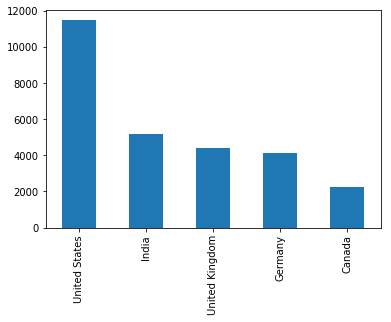

In [34]:
countries = data_1.Country.str.split('; ', expand=True).stack().value_counts()
countries.head(5).plot(kind='bar')
plt.savefig('Countries')

## Top 2 Countries participated in the Survey are 
* 1) US
* 2) India

## Data Modelling

### a) Employment Status of the participants participated in survey from US and India

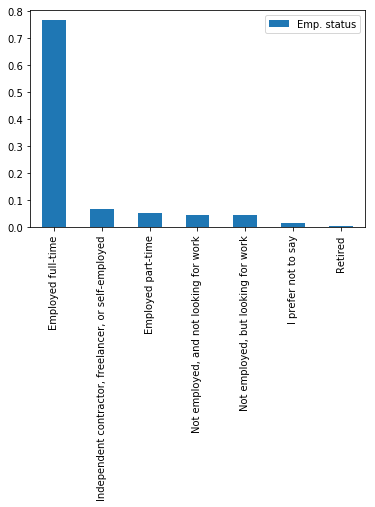

In [35]:
df_US = data_1[data_1['Country'] == 'United States']
US_1 = df_US['EmploymentStatus'].str.split('; ', expand=True).stack().value_counts()
(US_1/(US_1.sum())).plot(kind='bar', label = 'Emp. status')
plt.legend()
plt.savefig('Employment Status US')

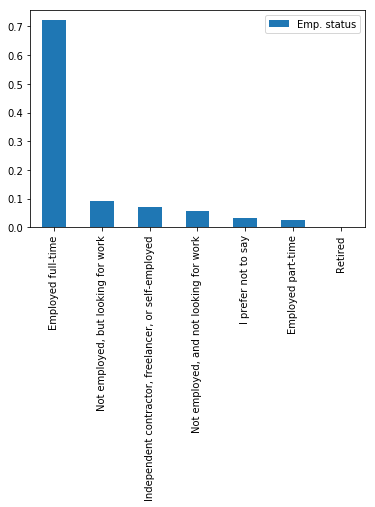

In [36]:
df_IN = data_1[data_1['Country'] == 'India']
IN_1 = df_IN['EmploymentStatus'].str.split('; ', expand=True).stack().value_counts()
(IN_1/(IN_1.sum())).plot(kind='bar', label = 'Emp. status')
plt.legend()
plt.savefig('Employment Status IN')

## Evaluating the results for Question 1

#### From the above plots we can see that the more than 70 % of the participants in both countries are Full time Employed.

### b) JobSatisfaction of the participants participated in survey from US and India

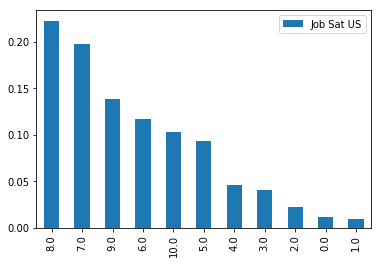

In [37]:
df.CareerSatisfaction.fillna(0.0) ## NaN's are imputed with 0.0
US_2 = df['JobSatisfaction'].value_counts()
(US_2/(US_2.sum())).plot(kind='bar',label='Job Sat US')
plt.legend()
plt.savefig('JobSatisfaction US')

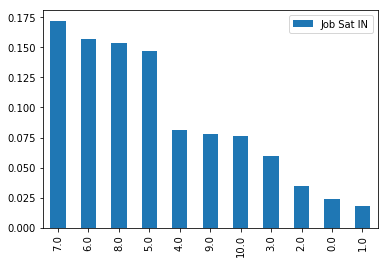

In [38]:
df.CareerSatisfaction.fillna(0.0) # All NaN's are imputed with 0.0
IN_2 = df_IN['JobSatisfaction'].value_counts()
(IN_2/(IN_2.sum())).plot(kind='bar', label = 'Job Sat IN')
plt.legend()
plt.savefig('JobSatisfaction IN')

#### In US we can see that appr. 75 % of the User participated in survey are having Job Sat above  than 7.0
#### In India we can see that appr. 65 % of the User participated in survey are having Job Sat between 5.0 and 8.0

### c) Career Satisfaction of the participants participated in survey from US and India

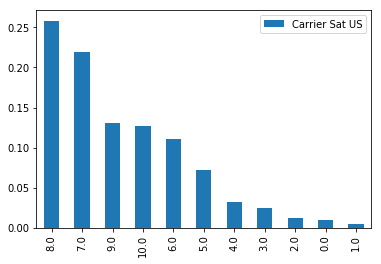

In [39]:
df.CareerSatisfaction.fillna(0.0)
US_3 = df['CareerSatisfaction'].value_counts()
(US_3/(US_3.sum())).plot(kind='bar',label='Carrier Sat US')
plt.legend()
plt.savefig('CareerSatisfaction US')

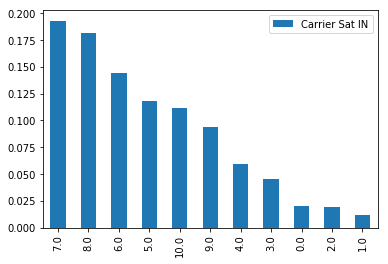

In [40]:
df.CareerSatisfaction.fillna(0.0)
IN_2 = df_IN['CareerSatisfaction'].value_counts()
(IN_2/(IN_2.sum())).plot(kind='bar', label = 'Carrier Sat IN')
plt.legend()
plt.savefig('CareerSatisfaction IN')

#### In US we can see that appr. 75 % of the User participated in survey are having Job Sat more than 7.0.

#### In India we see that appr. 65 % of the User participated in survey are having Job Sat between 5.0 and 8.0.

#### Also Job Sat is highly correlated with Career Sat.

## Question 2: What are the most common languages, technologies, methodologies and tools used by professionals

## Data Prepration

Data prepation is done by selecting the desired fields and rows which shows if the professional developer has participated in the survey.

All rows with only Professional developers are selected and other rows are dropped. This will also elimintate NAN and Categorial values

In [41]:
q1 = df[['Professional', 'HaveWorkedLanguage', 'HaveWorkedFramework', 'HaveWorkedDatabase', 'Methodology']]
q1 = q1[q1.Professional == "Professional developer"]
q1.head()

,Professional,HaveWorkedLanguage,HaveWorkedFramework,HaveWorkedDatabase,Methodology
2,Professional developer,Java; PHP; Python,NaN,MySQL,Agile; Lean; Scrum; Extreme; Pair; Kanban
4,Professional developer,NaN,NaN,NaN,NaN
7,Professional developer,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,React,Redis; MySQL; PostgreSQL,Agile; Pair; Kanban
8,Professional developer,C#; JavaScript,AngularJS; Node.js; .NET Core,SQL Server,Agile; Scrum; Pair; Kanban; Domain-driven design
9,Professional developer,Objective-C; Swift,NaN,PostgreSQL,Agile; Scrum; Pair; Kanban


## Data Modeling

### The most commonly used languages are:

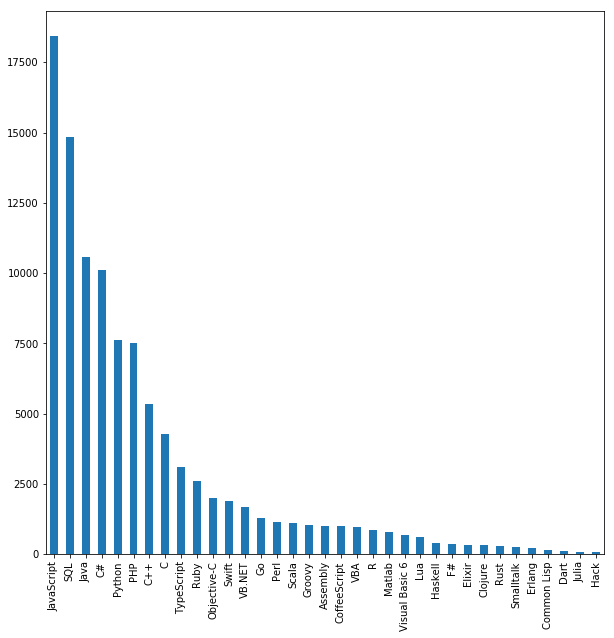

In [42]:
languages = q1['HaveWorkedLanguage'].str.split('; ', expand=True).stack().value_counts()

plt.figure(figsize=(10,10))
languages.plot(kind="bar")

plt.savefig('languages')

### The most commonly used frameworks are:

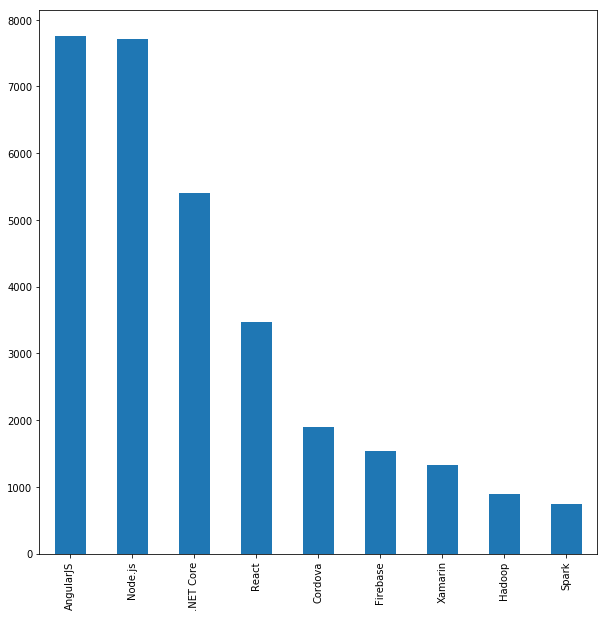

In [43]:
frameworks = q1['HaveWorkedFramework'].str.split('; ', expand=True).stack().value_counts()

plt.figure(figsize=(10,10))
frameworks.plot(kind="bar")

plt.savefig('frameworks')

### The most commonly used databases are:

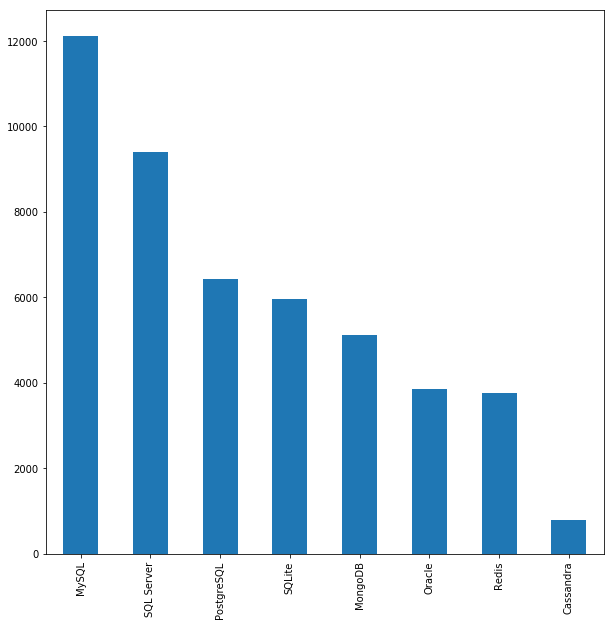

In [44]:
databases = q1['HaveWorkedDatabase'].str.split('; ', expand=True).stack().value_counts()

plt.figure(figsize=(10,10))
databases.plot(kind="bar")

plt.savefig('databases')

### The most commonly used methodologies are

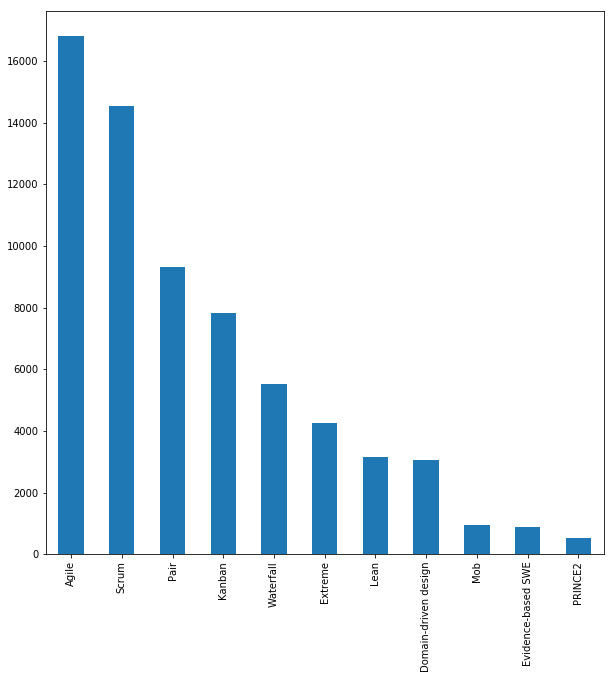

In [45]:
methodologies = q1['Methodology'].str.split('; ', expand=True).stack().value_counts()

plt.figure(figsize=(10,10))
methodologies.plot(kind="bar")

plt.savefig('methodologies')

## Evaluation of results for Question 2 : 

#### Top 5 languages used are 
* a) Java Script, 
* b) SQL, 
* c) Java, 
* d) C#, 
* e) Python

#### Top 5  frameworks used are 
* a) AngularJS, 
* b) Node.js, 
* c) .Net, 
* d) React, 
* e) Cordova

#### Top5  databases used are 
* a) MY SQL, 
* b) SQL Server, 
* c) PostgreSQL, 
* d) SQLite, 
* e) MongoDB

#### Top5  Methodologies used are 
* a) Agile, 
* b) Scrum, 
* c) Pair, 
* d) Kanban, 
* e) Waterfall

## Question 3: Which programming language has the highest job satisfaction

Lets prepare a data necessary to answer the above question. All rows with only Professional developers are selected and other rows are dropped. This will also elimintate NAN and Categorial values

In [18]:
q3 = df[['Professional', 'HaveWorkedLanguage', 'JobSatisfaction']]
q3 = q3[q3.Professional == "Professional developer"]
q3 = q3.drop('Professional', 1)
q3 = q3.dropna(subset=['JobSatisfaction', 'HaveWorkedLanguage'], axis=0)
q3.head()

,HaveWorkedLanguage,JobSatisfaction
2,Java; PHP; Python,9.0
7,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,7.0
8,C#; JavaScript,6.0
9,Objective-C; Swift,8.0
13,Java; JavaScript; Ruby; SQL,6.0


In [19]:
def split_column(column_to_split, delimeter, column_to_store, df):
    """
    Method to split a columns values by a provided delimeter while
    retaining the associated value of another column.
    
    :param str column_to_split: column whose values are to be split
    :param str delimeter: delimeter to split by
    :param str columns_to_store: column who's data must be stored along split rows
    :param DataFrame df: dataframe to use
    """
    split_col = pd.DataFrame(columns = [column_to_split, column_to_store])
    for index, row in df.iterrows():
        columns = row[column_to_split].split(delimeter)
        for c in columns:
            split_col.loc[len(split_col)] = [c, row[column_to_store]]
    return split_col

In [20]:
split_languages_q3 = split_column("HaveWorkedLanguage", "; ", "JobSatisfaction", q3)
q3_answer = split_languages_q3.groupby(['HaveWorkedLanguage']).mean()['JobSatisfaction'].sort_values()
q3_answer.head(50)

HaveWorkedLanguage
Visual Basic 6    6.899110
VB.NET            6.901878
Common Lisp       6.907143
Haskell           6.918768
Hack              6.969231
Java              6.984875
Matlab            6.988204
SQL               7.000276
Rust              7.003745
Julia             7.015152
C#                7.019202
PHP               7.023412
F#                7.030641
C                 7.037010
R                 7.043317
Dart              7.048544
Clojure           7.049020
JavaScript        7.062319
VBA               7.063559
C++               7.072574
Assembly          7.083074
Erlang            7.086538
Groovy            7.102786
Perl              7.104779
Python            7.114650
Lua               7.159933
Go                7.164094
Scala             7.192627
Ruby              7.216344
Swift             7.217698
TypeScript        7.229228
CoffeeScript      7.251020
Elixir            7.307190
Objective-C       7.317123
Smalltalk         7.461864
Name: JobSatisfaction, dtype: float6

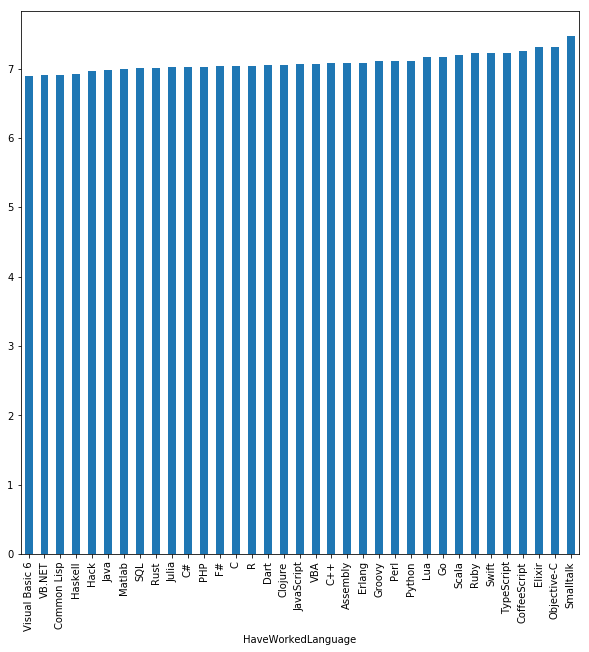

In [21]:
plt.figure(figsize=(10,10))
q3_answer.plot(kind = 'bar')
plt.savefig('q3')

## Evaluating the results for Question 3 above:
Those with more specialised skill sets feel that they are more valuable and therefore are more satisfied with their jobs.